Revision de segunda variable regresion logistica

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset

In [2]:
# Cargar el dataset
df = pd.read_csv('heart_cleveland_upload.csv')

En base a lo validado en el anterior modelo retomamos la variable objetivo condicion, con las variables que se identificaron con mas peso 

In [3]:
# Selección de variables predictoras y objetivo
features = ['thal', 'ca', 'oldpeak', 'exang', 'cp', 'slope', 'thalach']
X = df[features]
y = df['condition']

In [5]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Crear y entrenar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [7]:
# Mostrar resultados
print("Precisión del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", classification_rep)
print("AUC-ROC:", roc_auc)

# Coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': log_reg.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)
print("\nCoeficientes del modelo:\n", coef_df)

Precisión del modelo: 0.8333333333333334

Matriz de Confusión:
 [[42  6]
 [ 9 33]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        48
           1       0.85      0.79      0.81        42

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

AUC-ROC: 0.8933531746031746

Coeficientes del modelo:
   Variable  Coeficiente
1       ca     1.012962
0     thal     0.887550
2  oldpeak     0.726560
4       cp     0.331010
3    exang     0.309837
5    slope     0.183040
6  thalach    -0.503233


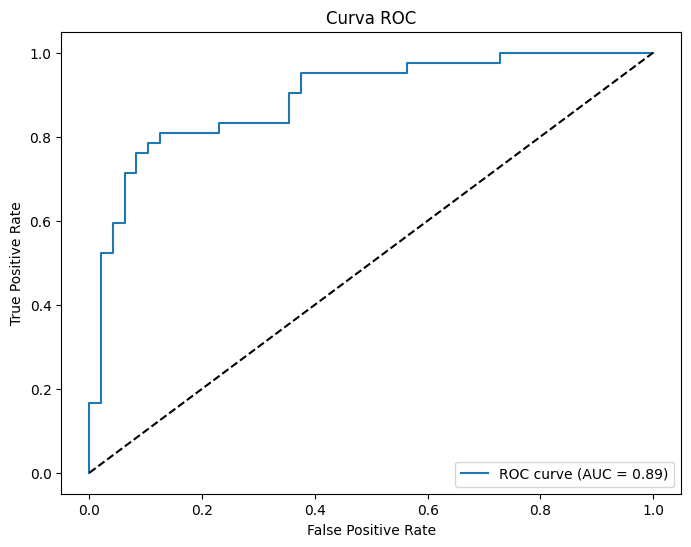

In [9]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


C:\Users\MauricioPC\AppData\Local\Temp\ipykernel_19740\1085391848.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='viridis')


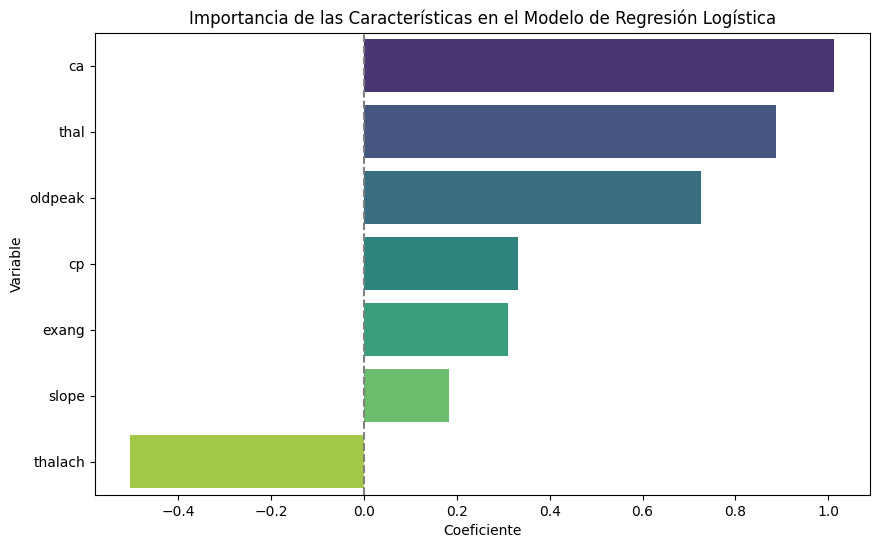

In [10]:
# Gráfica de Importancia de Características (Coeficientes)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='viridis')
plt.title('Importancia de las Características en el Modelo de Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.axvline(0, color='gray', linestyle='--')
plt.show()
